In [1]:
!gdown 1921iiFdPwc7F20fUTlJhxsJTLu2qE89m # Download File https://drive.google.com/file/d/1921iiFdPwc7F20fUTlJhxsJTLu2qE89m/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1921iiFdPwc7F20fUTlJhxsJTLu2qE89m
To: /content/flight.csv
100% 8.94M/8.94M [00:00<00:00, 48.8MB/s]


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('flight.csv')
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
35320,6848,9/9/2012,9/12/2012,Male,4,wuxishi,-,CN,48.0,3/31/2014,...,0.0,6281,9/19/2012,560,1.400000,2,0,0.926946,5451,0
53587,4323,8/28/2009,9/1/2010,Female,4,NaN,NaN,CN,37.0,3/31/2014,...,2167.0,2963,11/5/2013,148,54.000000,54,0,0.749936,2241,0
42669,39200,1/17/2009,1/17/2009,Male,4,KITA KATSURAGI GON,NARA PRF,JP,49.0,3/31/2014,...,4600.0,5286,9/28/2013,186,5.000000,5,0,0.770000,8966,2
12691,10089,3/26/2007,10/26/2007,Male,4,nanhai,guangdong,CN,32.0,3/31/2014,...,5653.0,33048,3/12/2014,20,27.739130,253,3,0.553998,32570,27
27761,43201,12/5/2012,1/9/2013,Male,4,beijing,.,CN,48.0,3/31/2014,...,7322.0,9502,1/11/2014,81,28.230769,76,0,0.874400,7697,0


# Stage 1 - EDA

## Statistical Descriptive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [5]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [6]:
df.duplicated(subset=['MEMBER_NO']).sum()

0

In [7]:
cat = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
time = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
num = df.drop(cat+time+['MEMBER_NO'], axis=1).columns.to_list()

In [8]:
df[cat].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


In [9]:
df[num].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [10]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print('unique:', df[col].nunique())
    print(df[col].value_counts())
    print()

Value count kolom GENDER:
unique: 2
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
unique: 3234
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
unique: 1165
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1165, dtype: int64

Value count kolom WORK_COUNTRY:
unique: 118
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: WORK_COUNTRY, Length: 118, dtype: int64



Summary:

- Ubah kolom kelompok time menjadi format datetime
- Missing value pada data kategorikal akan diisi nilai modus sedangkan data numerikal akan  diisi nilai median
- Kolom `avg_discount` nilai maksimal seharusnya 1, dimana nilai 1 berarti diskon 100%. Nilai lebih dari 1 akan di drop
- Kolom `WORK_PROVINCE` dan `WORK_CITY` yang memiliki kategori yang sangat banyak akan di drop
- Kolom `WORK_COUNTRY` didominasi oleh value CN, akan diubah bentuk boolean dengan nilai 1 mewakili CN dan 0 mewakili selain CN

## Univariate Analysis

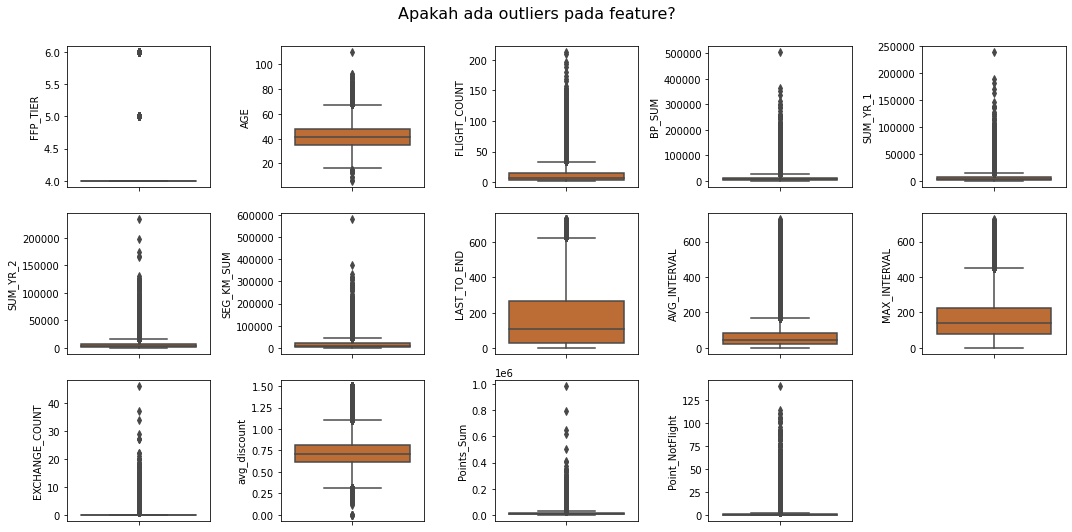

In [11]:
plt.figure(figsize=(15,7))
for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[num[i]], color='chocolate')
    plt.tight_layout()
plt.suptitle('Apakah ada outliers pada feature?', y=1.05, size=16)
plt.show()

Text(0.5, 1.05, 'Bagaimana distribusi pada feature?')

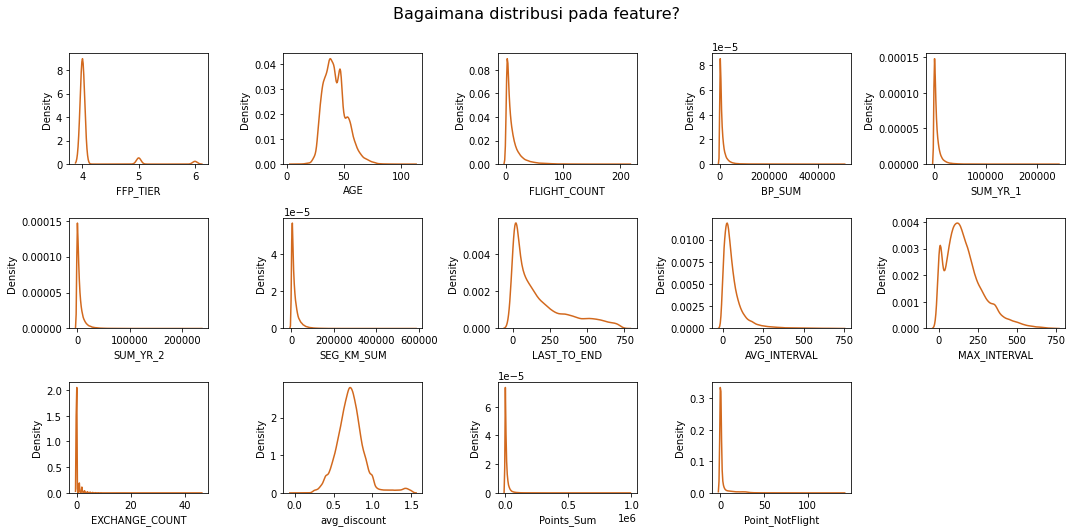

In [12]:
plt.figure(figsize=(15,7))
for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[num[i]], color='chocolate')
    plt.tight_layout()
plt.suptitle('Bagaimana distribusi pada feature?', y=1.05, size=16)

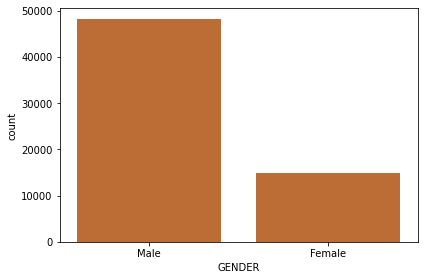

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(df['GENDER'], color='chocolate')
plt.tight_layout()
# plt.suptitle('Bagaimana distribusi pada feature?', y=1.05, size=16)

## Multivariate Analysis

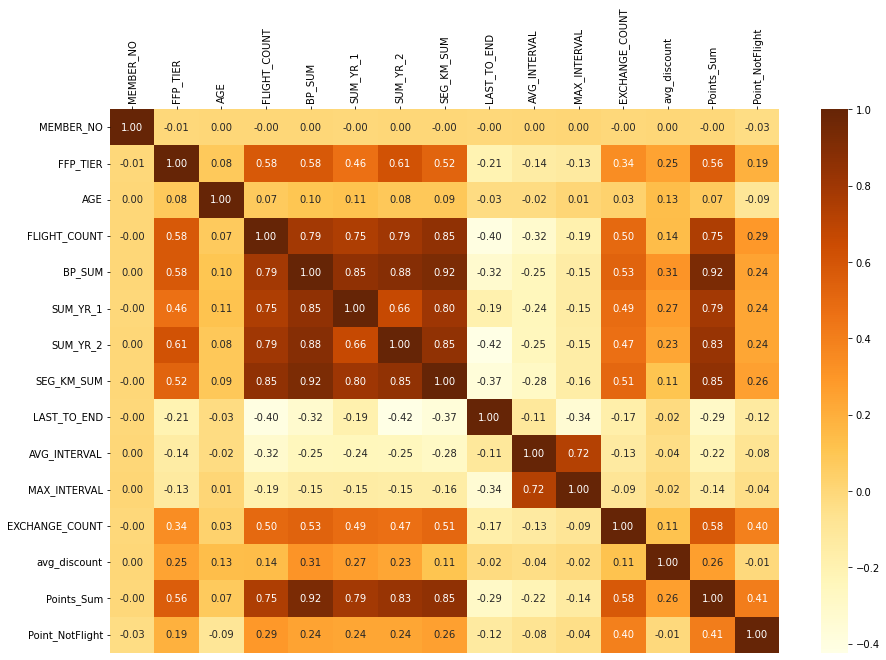

In [14]:
fig = plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), cmap='YlOrBr', annot=True, fmt='.2f')
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

- terdapat banyak data yang memiliki korelasi yang sangat tinggi yang kemungkinan menjadi data redundant
- `BP_SUM`, `SEG_KM_SUM`, `Points_Sum` memiliki korelasi yang sangat tinggi dan nilainya sama, untuk menghindari data redundan akan digunakan salah satu dan drop yang lain
- `AGE`, `AVG_INTERVAL`, `MAX_INTERVAL` akan di drop karena memiliki korelasi yang rendah dengan fitur lain

# Stage 2 - Preprocessing

## Fixing Data Type

In [15]:
df[df['LAST_FLIGHT_DATE'].str.contains('2014/2/29')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [16]:
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28')

In [17]:
for col in time:
    df[col] = pd.to_datetime(df[col])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

## Handle Missing Value

In [19]:
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)

df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(), inplace=True)

In [20]:
df.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## Handle Outliers

In [21]:
# dfz = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 62988
Jumlah baris setelah memfilter outlier: 54306


## Feature Engineering

In [22]:
df['WORK_COUNTRY'] = np.where(df['WORK_COUNTRY'] == 'CN', 1, 0)
df['GENDER'] = np.where(df['GENDER'] == 'Male', 1, 0)

Kami menambahkan kolom baru yakni `Length` yang yang merepresentasikan seberapa lama customer menjadi member Frequent Flyer Program.

In [23]:
df['Length'] = np.abs(df['LOAD_TIME'] - df['FFP_DATE']) / np.timedelta64(1, 'D')

In [24]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,...,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Length
1028,34723,2010-08-20,2010-12-17,1,4,1,54.0,2014-03-31,47,59849,...,79014,2014-03-28,4,15.760870,104,0,0.886656,61205,2,1319.0
1216,31964,2011-02-23,2011-03-14,1,5,0,27.0,2014-03-31,13,59544,...,77042,2014-03-26,6,60.416667,259,0,0.844046,59544,0,1132.0
1305,44675,2007-08-02,2007-08-04,1,5,1,60.0,2014-03-31,50,57257,...,79538,2014-03-06,26,14.244898,58,0,0.796850,58412,0,2433.0
1320,53994,2007-02-12,2007-02-13,1,4,1,50.0,2014-03-31,36,54184,...,77225,2014-03-24,8,19.942857,67,1,0.817883,61576,4,2604.0
1331,30848,2009-07-19,2009-07-19,1,5,1,32.0,2014-03-31,49,58236,...,75716,2014-03-31,1,14.916667,126,3,0.832198,61637,3,1716.0


## Drop Unimportant Columns

In [25]:
df_final = df.drop(['WORK_CITY', 'WORK_PROVINCE', 'AGE', 'BP_SUM', 'AVG_INTERVAL', 'MAX_INTERVAL', 'Points_Sum'], axis=1)

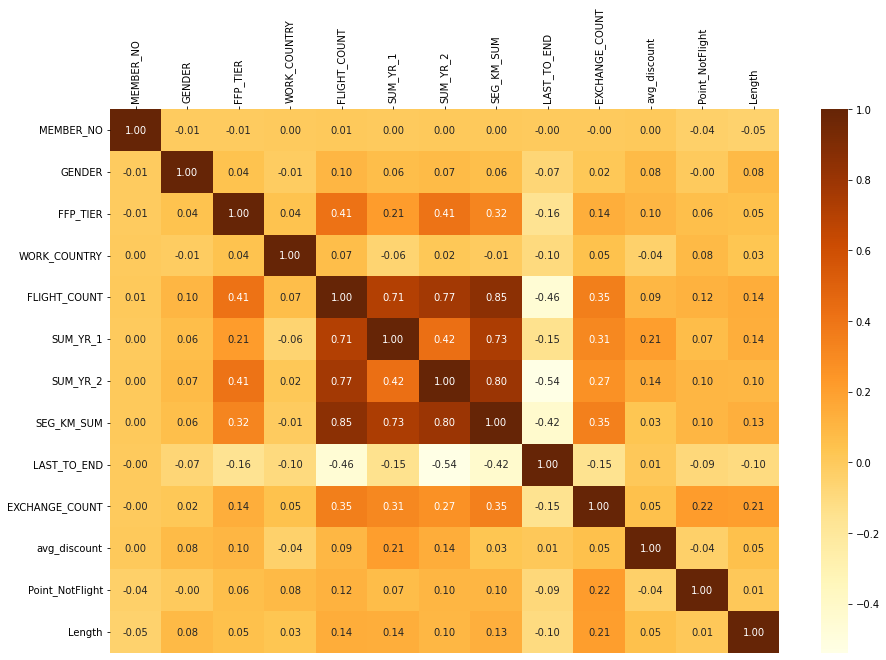

In [26]:
fig = plt.figure(figsize=(15, 10))
ax = sns.heatmap(df_final.corr(), cmap='YlOrBr', annot=True, fmt='.2f')
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

## Feature Selection

Berdasarkan nilai korelasi di atas kami memutuskan untuk menggunakan metode yang paling umum untuk melakukan segmentasi yaitu RFM (Recency Frequency Monetary) dimana 3 fitur penting yang digunakan memiliki korelasi yang tinggi, antara lain:
- Recency: seberapa lama customer melakukan transaksi terakhirnya. Pada data ini dapat direpresentasikan dengan fitur `LAST_TO_END`
- Frequency: seberapa sering customer melakukan transaksi. Pada data ini dapat direpresentasikan dengan fitur `FLIGHT_COUNT`
- Monetary: seberapa banyak pengeluaran atau waktu yang dihabiskan customer. Pada data ini kami lebih memilih jumlah jarak perjalanan lebih memiliki value dibandingkan total pengeluaran yang dihabiskan customer. Karena customer yang sering melakukan perjalanan dengan harga normal lebih berharga dibanding customer yang membeli tiket mahal namun jarang melakukan perjalanan. Hal ini dapat direpresentasikan dengan fitur `SEG_KM_SUM`

Kami juga akan memilih fitur `Length` sehingga dapat mengukur seberapa lama customer menjadi member Frequent Flyer Program.

In [27]:
lrfm = df_final[['Length', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']]
lrfm.columns = ['Length', 'Recency', 'Frequency', 'Monetary']

## Standardization

In [28]:
feats = ['Length', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']
X = df[feats]

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df_std = pd.DataFrame(X_std, columns = ['Length', 'Recency', 'Frequency', 'Monetary'])
df_std.describe()

,Length,Recency,Frequency,Monetary
count,5.430600e+04,5.430600e+04,5.430600e+04,5.430600e+04
mean,-1.297938e-16,3.349518e-17,-6.699037e-17,3.349518e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.291874e+00,-9.965145e-01,-8.574908e-01,-1.043168e+00
25%,-8.808016e-01,-8.203449e-01,-7.478252e-01,-7.109896e-01
50%,-2.612060e-01,-3.665746e-01,-3.091625e-01,-3.461454e-01
75%,8.232358e-01,5.516429e-01,3.488316e-01,3.681460e-01
max,2.379096e+00,2.879217e+00,4.735459e+00,5.029608e+00


# Stage 3 - Clustering

For n_clusters = 2, silhouette score is 0.3780598171853187)
For n_clusters = 3, silhouette score is 0.31897841310160274)
For n_clusters = 4, silhouette score is 0.3487652364487125)
For n_clusters = 5, silhouette score is 0.3309071392560902)
For n_clusters = 6, silhouette score is 0.32491273004196614)
For n_clusters = 7, silhouette score is 0.32402196245236103)
For n_clusters = 8, silhouette score is 0.3035154045088447)
For n_clusters = 9, silhouette score is 0.28685689437373063)
For n_clusters = 10, silhouette score is 0.27172591868916696)


<AxesSubplot:>

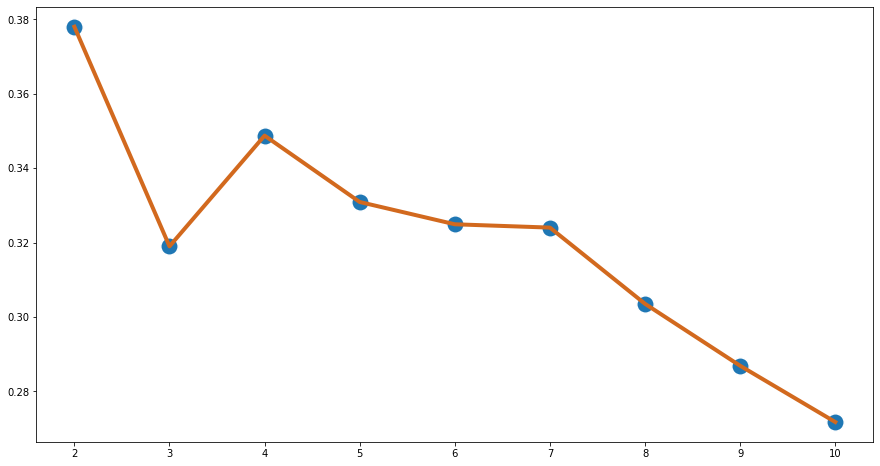

In [29]:
silhouette = []
# clus = []
# pred = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    clusters = kmeans.fit(df_std)
    preds = clusters.predict(df_std)
    # inertia.append(kmeans.inertia_)
    
    score = silhouette_score(df_std, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(i, score))
    # clus.append(clusters)
    # pred.append(preds)

plt.figure(figsize=(15, 8))
# plt.plot()

sns.lineplot(x=range(2, 11), y=silhouette, color='chocolate', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=silhouette, s=300)

## Elbow Method

<AxesSubplot:>

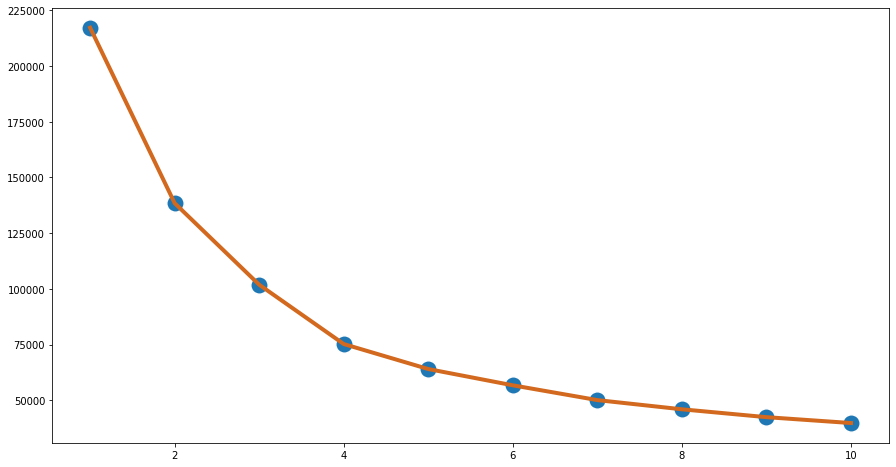

In [30]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(15, 8))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='chocolate', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300)

Dari grafik di atas diketahui nilai optimalnya adalah 4 cluster

## K-Means Clustering

In [31]:
kmeans = KMeans(n_clusters=4, random_state=10)
kmeans.fit(df_std.values)
df_std['Cluster'] = kmeans.labels_
df_std.sample(5)

,Length,Recency,Frequency,Monetary,Cluster
19226,1.613116,-0.686883,0.019835,-0.017119,1
31604,1.772048,-0.980499,-0.089831,-0.351953,1
27175,-0.870047,0.087196,-0.528494,-0.243907,0
35519,-0.945330,2.404093,-0.857491,-0.640023,2
39019,-1.227345,0.418181,-0.747825,-0.640710,0


In [46]:
df['Cluster'] = kmeans.labels_
df['Cluster'] = df['Cluster'].astype('category')
# lrfm['MemberID'] = lrfm['MemberID'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54306 entries, 1028 to 62979
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          54306 non-null  int64         
 1   FFP_DATE           54306 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  54306 non-null  datetime64[ns]
 3   GENDER             54306 non-null  int64         
 4   FFP_TIER           54306 non-null  int64         
 5   WORK_COUNTRY       54306 non-null  int64         
 6   AGE                54306 non-null  float64       
 7   LOAD_TIME          54306 non-null  datetime64[ns]
 8   FLIGHT_COUNT       54306 non-null  int64         
 9   BP_SUM             54306 non-null  int64         
 10  SUM_YR_1           54306 non-null  float64       
 11  SUM_YR_2           54306 non-null  float64       
 12  SEG_KM_SUM         54306 non-null  int64         
 13  LAST_FLIGHT_DATE   54306 non-null  datetime64[ns]
 14  LAS

In [47]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,...,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Length,Cluster
50115,23668,2013-03-20,2013-03-20,1,4,1,47.0,2014-03-31,4,2370,...,2013-04-06,361,5.666667,17,0,0.400000,2370,0,376.0,1
62271,31296,2009-12-23,2010-04-14,1,4,1,42.0,2014-03-31,2,771,...,2013-07-04,272,184.000000,184,0,0.622329,1271,1,1559.0,1
8133,54712,2006-03-31,2006-06-16,0,4,1,46.0,2014-03-31,23,18694,...,2014-01-08,84,26.954545,116,2,0.556756,19022,6,2922.0,2
56312,21725,2008-10-19,2009-02-19,1,4,0,58.0,2014-03-31,2,1620,...,2013-04-07,360,241.000000,241,0,0.754342,1620,0,1989.0,0
46496,18846,2006-05-15,2006-05-17,1,4,1,36.0,2014-03-31,4,2763,...,2013-06-25,281,44.666667,69,0,0.560000,7886,21,2877.0,0


In [55]:
# for i in range(0,1):
#   print('Cluster: ', i)
#   display(df[df['Cluster'] == i].describe(include=[object]))
df[df['Cluster'] == 2].describe(include=['category']).T

,count,unique,top,freq
Cluster,6908,1,2,6908


In [56]:
for i in range(0,4):
  print('Cluster: ', i)
  display(df[df['Cluster'] == i].describe().T)

Cluster:  0


,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,14259.0,30238.820324,18240.782550,1.000000,12486.500000,29746.000000,46302.50000,62987.000000
GENDER,14259.0,0.792342,0.405645,0.000000,1.000000,1.000000,1.00000,1.000000
FFP_TIER,14259.0,4.011081,0.104684,4.000000,4.000000,4.000000,4.00000,5.000000
WORK_COUNTRY,14259.0,0.917666,0.274882,0.000000,1.000000,1.000000,1.00000,1.000000
AGE,14259.0,45.260677,8.924513,13.000000,39.000000,44.000000,51.00000,72.000000
FLIGHT_COUNT,14259.0,6.717371,4.283483,2.000000,3.000000,6.000000,9.00000,25.000000
BP_SUM,14259.0,5625.375482,4389.160050,0.000000,2388.500000,4462.000000,7746.50000,40928.000000
SUM_YR_1,14259.0,2879.042219,3029.436582,0.000000,473.000000,2123.000000,4294.00000,27996.000000
SUM_YR_2,14259.0,2849.325759,2758.954022,0.000000,796.500000,2215.000000,4128.50000,27383.000000
SEG_KM_SUM,14259.0,9583.559997,6448.134287,368.000000,4531.000000,8039.000000,13302.00000,55729.000000


Cluster:  1


,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,19021.0,31933.256664,18110.567408,6.000000,16037.000000,32399.000000,48216.000000,62753.000000
GENDER,19021.0,0.705273,0.455932,0.000000,0.000000,1.000000,1.000000,1.000000
FFP_TIER,19021.0,4.003312,0.057457,4.000000,4.000000,4.000000,4.000000,5.000000
WORK_COUNTRY,19021.0,0.902318,0.296891,0.000000,1.000000,1.000000,1.000000,1.000000
AGE,19021.0,39.738342,9.535464,15.000000,32.000000,38.000000,46.000000,72.000000
FLIGHT_COUNT,19021.0,3.775143,1.933452,2.000000,2.000000,3.000000,5.000000,20.000000
BP_SUM,19021.0,3035.427107,2504.531023,0.000000,1422.000000,2443.000000,3965.000000,45863.000000
SUM_YR_1,19021.0,2078.995599,2229.872413,0.000000,540.000000,1577.000000,2845.000000,26200.000000
SUM_YR_2,19021.0,1142.414805,1448.472664,0.000000,0.000000,651.000000,1895.000000,21710.000000
SEG_KM_SUM,19021.0,5418.803323,3482.082479,368.000000,2972.000000,4640.000000,6910.000000,36880.000000


Cluster:  2


,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,6908.0,31388.527939,18134.413092,2.000000,15900.750000,30986.500000,47175.750000,62984.000000
GENDER,6908.0,0.833382,0.372662,0.000000,1.000000,1.000000,1.000000,1.000000
FFP_TIER,6908.0,4.195426,0.396557,4.000000,4.000000,4.000000,4.000000,5.000000
WORK_COUNTRY,6908.0,0.941951,0.233852,0.000000,1.000000,1.000000,1.000000,1.000000
AGE,6908.0,44.162565,8.739381,14.000000,38.000000,43.000000,49.000000,72.000000
FLIGHT_COUNT,6908.0,28.335408,9.057238,4.000000,22.000000,27.000000,34.000000,53.000000
BP_SUM,6908.0,24105.281413,9010.075103,2203.000000,17481.500000,22593.500000,29271.750000,59849.000000
SUM_YR_1,6908.0,11263.439635,6044.198767,0.000000,6978.000000,10640.000000,14920.500000,29538.000000
SUM_YR_2,6908.0,12946.714244,6165.610784,0.000000,8383.000000,12163.000000,16701.250000,31654.000000
SEG_KM_SUM,6908.0,40019.459902,12873.457976,6874.000000,30232.500000,37860.000000,47813.250000,79843.000000


Cluster:  3


,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,14118.0,32471.361383,18129.273151,11.000000,16217.250000,32817.500000,49267.500000,62988.000000
GENDER,14118.0,0.762289,0.425696,0.000000,1.000000,1.000000,1.000000,1.000000
FFP_TIER,14118.0,4.021037,0.143513,4.000000,4.000000,4.000000,4.000000,5.000000
WORK_COUNTRY,14118.0,0.923502,0.265803,0.000000,1.000000,1.000000,1.000000,1.000000
AGE,14118.0,40.952330,9.225973,13.000000,34.000000,40.000000,47.000000,72.000000
FLIGHT_COUNT,14118.0,12.034778,4.953849,2.000000,8.000000,11.000000,15.000000,38.000000
BP_SUM,14118.0,10147.249752,5513.133586,0.000000,6244.250000,9134.000000,12904.250000,59632.000000
SUM_YR_1,14118.0,4656.448293,3975.138664,0.000000,1738.250000,3849.000000,6632.250000,29480.000000
SUM_YR_2,14118.0,5657.175733,3841.206451,0.000000,2928.000000,4927.000000,7527.750000,31634.000000
SEG_KM_SUM,14118.0,17367.525004,7609.046755,1840.000000,11612.250000,16116.000000,21782.750000,63910.000000


In [48]:
display(df.groupby('Cluster').agg(['mean','median','min','max','count']))

MEMBER_NO                             \
                 mean   median min    max  count   
Cluster                                            
0        30238.820324  29746.0   1  62987  14259   
1        31933.256664  32399.0   6  62753  19021   
2        31388.527939  30986.5   2  62984   6908   
3        32471.361383  32817.5  11  62988  14118   

                             FFP_DATE                                 \
                                 mean              median        min   
Cluster                                                                
0       2007-07-07 03:00:15.905743616 2007-08-20 00:00:00 2004-11-01   
1       2011-10-25 03:17:12.816360704 2012-01-24 00:00:00 2008-04-17   
2       2009-02-19 23:06:38.147075840 2008-12-11 12:00:00 2004-11-01   
3       2011-08-03 17:21:54.237144064 2011-10-18 00:00:00 2008-01-16   

                           ... Point_NotFlight                        \
               max  count  ...            mean median min max  count   
Cluster                    ...                                         
0       2010-01-19  14259  ...        1.017463    0.0   0  24  14259   
1       2013-03-31  19021  ...        1.324746    0.0   0  24  19021   
2       2013-03-31   6908  ...        2.495947    1.0   0  24   6908   
3       2013-03-31  14118  ...        1.479246    0.0   0  24  14118   

              Length                                 
                mean  median     min     max  count  
Cluster                                              
0        2458.874816  2415.0  1532.0  3437.0  14259  
1         887.863046   797.0   365.0  2174.0  19021  
2        1865.037058  1935.5   365.0  3437.0   6908  
3         970.276456   895.0   365.0  2266.0  14118  

[4 rows x 110 columns]

## Clustering Visualization

### Pairplot

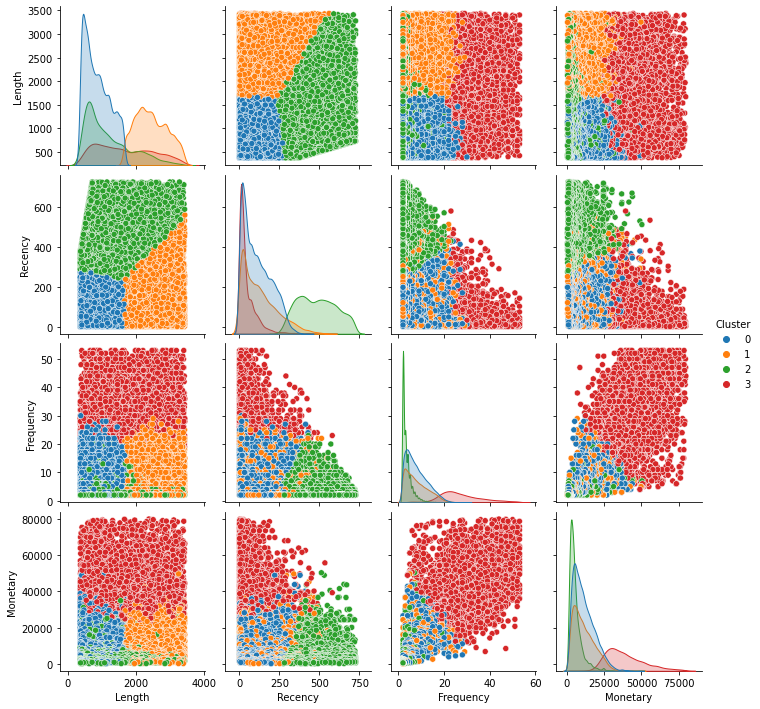

In [35]:
sns.pairplot(data=lrfm, hue='Cluster')
plt.savefig('pairplot.png')

### PCA

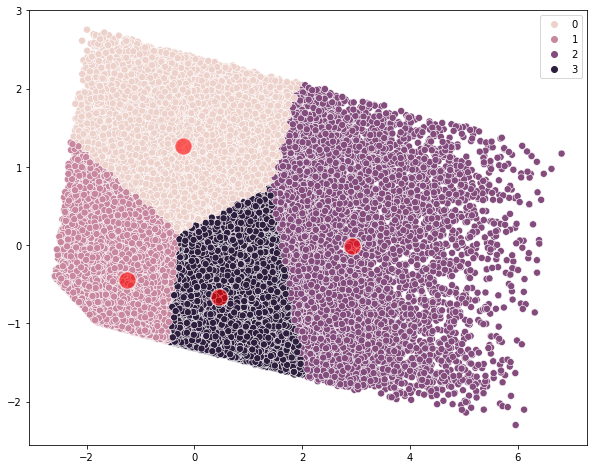

In [41]:
X = df_std.drop('Cluster', axis = 1)
# y = df_std['Cluster']

pca = PCA(n_components = 2)
pcs = pca.fit_transform(X)

kmeans = KMeans(n_clusters= 4, random_state=10)
fitted = kmeans.fit(pcs)
prediction = kmeans.predict(pcs)
centers2 = fitted.cluster_centers_

plt.figure(figsize = (10,8))
sns.scatterplot(pcs[:, 0], pcs[:, 1],hue=prediction ,s=50)
sns.scatterplot(centers2[:, 0], centers2[:, 1],color='red', s=300, alpha=0.6);

### Radar Plot

In [42]:
radar_plot = df_std.groupby('Cluster').agg('mean').reset_index()
radar_plot.columns = ['clusters', 'L', 'R', 'F', 'M']
radar_plot

,clusters,L,R,F,M
0,0,-0.691518,-0.413365,-0.211579,-0.219266
1,1,1.197544,-0.323729,-0.209257,-0.217273
2,2,-0.310631,1.589987,-0.684686,-0.652763
3,3,0.267838,-0.743883,1.886369,1.872343


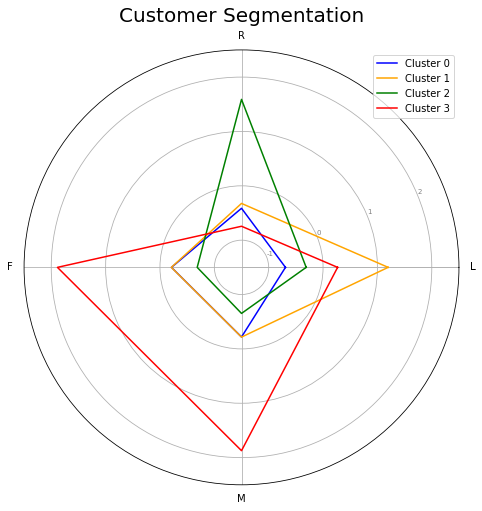

In [43]:
category = ['L', 'R', 'F', 'M']
categories = [*category, category[0]]
color = ['blue', 'orange', 'green', 'red']
clusters = []

for i in range(0,4):
    num = []
    for cat in category:
        num.append(radar_plot[cat][i])
    num.append(radar_plot['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
for i in range(0,4):
    plt.plot(label_loc, clusters[i], color=color[i], label=f'Cluster {i}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.legend()
plt.show()

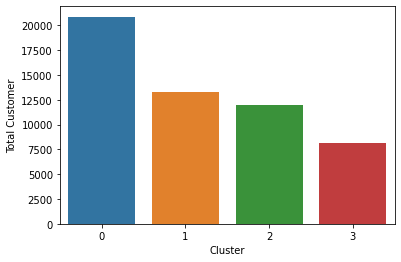

In [44]:
# data = lrfm.groupby('Cluster')['MemberID'].nunique().reset_index(name='Total Customer')
data = lrfm.groupby('Cluster')['Length'].agg('count').reset_index(name='Total Customer')
ax = sns.barplot(x='Cluster', y='Total Customer', data=data)
#     # ax.set_xlabel('Avg'+kolom[i])
# data

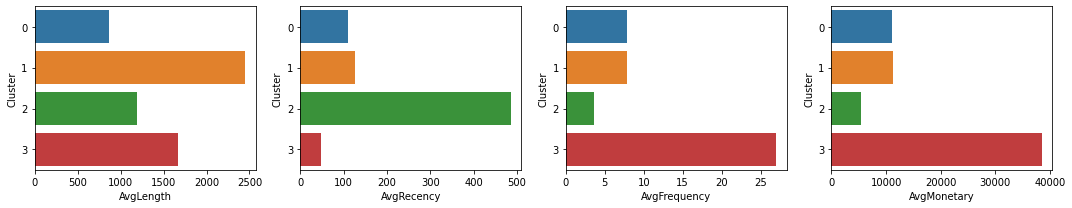

In [45]:
kolom = ['Length', 'Recency', 'Frequency', 'Monetary']
plt.figure(figsize=(15,3))
for i in range(0, len(kolom)):
    plt.subplot(1, 4, i+1)
    # data = df.copy()
    data = lrfm.groupby('Cluster')[kolom[i]].mean().reset_index(name='Avg'+ kolom[i])
    ax = sns.barplot(y='Cluster', x='Avg'+kolom[i], data=data)
    ax.set_xlabel('Avg'+kolom[i])

    # for container in ax.containers:
        # ax.bar_label(container, fontsize=11, fmt='%.2f')
        # ax.set_ylim(top=ax.get_ylim()[1]*1.1)
    plt.tight_layout()

## Evaluation

# Insights and Recommendations

Dari grafik diatas dapat diketahui setiap cluster memiliki karakteristik masing-masing sebagai berikut:
- Cluster 0 (Potential Customer): <br>
Customer pada clustre ini dapat dinilai potensial karena rata-rata merupakan customer baru dengan jarak transaksi rendah. Selain itu jumlah customer pada cluster ini yang tertinggi. Namun frekuensi pembelian dan jumlah perjalanannya rendah.
- Cluster 1 (Priority Customer): <br>
Pada cluster ini merupakan member yang sudah lama bergabung dengan jarak transaksi rendah. Namun frekuensi pembelian dan jumlah perjalanannya rendah. Sehingga customer pada cluster ini perlu diperhatikan lagi.
- Cluster 2 (General Customer): <br>
Customer pada cluster ini merupakan memiliki karakteristik customer pada umumnya dimana telah menjadi member cukup lama. Namun hanya melakukan perjalanan di waktu tertentu yang dapat dilihat dari lama tidak melakukan transaksi serta frekuensi pembelian dan jumlah perjalanannya paling rendah diantara cluster lain.
- Cluster 3 (Loyal Customer): <br>
Customer pada cluster ini dapat dikategorikan sebagai loyal customer melihat frekuensi dan jumlah perjalanannya tinggi serta rata-rata jarak antar transaksinya sangat rendah.

Recommendation:
1. Membuat program loyalty member yang mana semakin sering melakukan perjalanan akan lebih banyak mendapatkan diskon
2. Membuat promo dan diskon berdasarkan segmentasi customer 